In [1]:
# Below we have sections of short driver scripts that run different parts of the heatmap code
# Not all functions in the 5 functiond definition .py's are called yet,
# but the ones that are called so far compile below without error

#%load_ext autoreload
#%autoreload 2

In [2]:
import importlib
import setup_nx # your own module, setup.nx.py
import numpy as np
import math as m
import statistics as st
import cmath
import matplotlib.pyplot as plt 
import itertools
import random
import xlrd
from operator import add
importlib.reload(setup_nx)
from setup_nx import *
from graphviz import Source, render

import datetime
import time

import my_feeder_funcs as ff
import my_impedance_funcs as imp
import my_configVis_funcs as vis
import my_detControlMatExistence_funcs as ctrl
import my_detLznRange_funcs as lzn
import my_heatmapSetup_funcs as hm


<class 'module'>


In [3]:
# List functions in each helper .py
help(ff)
print("----------------------------------------------------------")
help(imp)
print("----------------------------------------------------------")
help(vis)
print("----------------------------------------------------------")
help(lzn)
print("----------------------------------------------------------")
help(hm)
print("----------------------------------------------------------")
help(ctrl)

Help on module my_feeder_funcs:

NAME
    my_feeder_funcs - # Hi

FUNCTIONS
    add(a, b, /)
        Same as a + b.
    
    clear_graph(feeder)
    
    feeder_init(modelpath, loadfolder, loadpath, timesteps, Vbase_ll, Sbase, depths, leaves)
    
    make_graph(feeder, file_name)
    
    nx_plot(feeder)

FILE
    /Users/brittanywais/Desktop/test/my_feeder_funcs.py


----------------------------------------------------------
Help on module my_impedance_funcs:

NAME
    my_impedance_funcs

FUNCTIONS
    add(a, b, /)
        Same as a + b.
    
    get_RX_ratio_between_two_buses(feeder, node_name_1, node_name_2, depths)
        #Returns the R/X ratio between 2 nodes
    
    get_RX_ratio_tosubst(feeder, node_name, depths)
        #Returns the R/X ratio from a node up to the substation
    
    get_total_impedance_between_two_buses(feeder, node_name_1, node_name_2, depths)
    
    get_total_impedance_from_substation(feeder, node_name, depths)
    
    plot_histogram_RX_ratios(feeder, le

In [4]:
# [Essential] specify input feeder data

#-----------------------------------------------------------------
'specifying file paths'
# Enter the path/name of the model's excel file and import
    # All GridBright load files should be in the following folder
    #loadfolder = "/Users/jasperpakshong/Documents/Berkeley/ENERGISE/IEEE13/"
    #loadpath = loadfolder + "IEEE13testload_w_extreme_act.xlsx"

    # filepath = "IEEE13/"
    # modelpath = filepath + "001 phasor08_IEEE13_OPAL.xls"
    # loadfolder = "IEEE13/"
    # loadpath = loadfolder + "001_phasor08_IEEE13_norm03_HIL_7_1.xlsx"

    #filepath = "AL0001/"
    #modelpath = filepath + "AL0001_OPAL_working.xls"
    #loadfolder = "AL0001/"
    #loadpath = loadfolder + "AL0001_tvload_afternoon1h.csv"
    
    #filepath = "13NF_balanced/"
    #modelpath = filepath + "016 GB_IEEE13_balance_all_ver2.xls"
    #loadfolder = "13NF_balanced/"
    #loadpath = loadfolder + "016 GB_IEEE13_balance all ver2_time_sigBuilder_secondWise_norm03.csv"

filepath = "13NF_balanced/"
modelpath = filepath + "impedMod_IEEE13 unbal copy.xlsx" #"016 GB_IEEE13_balance_all_ver2.xls"
loadfolder = "13NF_balanced/"
loadfile = "016 GB_IEEE13_balance all ver2_time_sigBuilder_secondwise_norm03.csv"
loadpath = loadfolder + loadfile
headerpath = '13NF_balanced/001_phasor08_IEEE13_time_header.csv'
load_data = '13NF_balanced/001_phasor08_IEEE13_time_PVpen50_cloud_minutewise (1).csv'

#==========================================================================================================

'specifying file name'
#file_name = string specifying name of dot file created when make_graph() is called
file_name = '13NF_test.dot'

#==========================================================================================================

'list actuator locations and performance node'
# all_act_locs = list of node names as strings where actuators will be placed
all_act_locs = ['bus_651','bus_611','bus_633']
perf_nodes = ['bus_651','bus_611','bus_633']

#==========================================================================================================

'Specify substation kV, kVA bases, name, and the number of timesteps in the load data'
Vbase_ll = 4160
Vbase = Vbase_ll / np.sqrt(3)
Sbase = 5000/3
substation_name = 'bus_650'
timesteps = 1

'DO NOT NEED TO EDIT THIS CELL BEFORE RUNNING'

ts = time.time()
print()
print(datetime.datetime.fromtimestamp(ts))

plot = 0 #turn plot on/off

depths = {}
leaves = []


2020-08-20 08:16:21.347486


len busdict= {'611': <setup_nx.bus object at 0xa1a94c0b8>, '632': <setup_nx.bus object at 0xa1a94c390>, '633': <setup_nx.bus object at 0xa1a94cc18>, '634': <setup_nx.bus object at 0xa1a94c898>, '645': <setup_nx.bus object at 0xa1a94cac8>, '646': <setup_nx.bus object at 0xa1a94c9e8>, '650': <setup_nx.bus object at 0xa1a94c9b0>, '651': <setup_nx.bus object at 0xa1a94cd68>, '652': <setup_nx.bus object at 0xa1a94cdd8>, '671': <setup_nx.bus object at 0xa1a94ceb8>, '675': <setup_nx.bus object at 0xa1a94cf28>, '680': <setup_nx.bus object at 0xa1a94cd30>, '684': <setup_nx.bus object at 0xa1a94c128>, '692': <setup_nx.bus object at 0xa1a94ce80>}
Finished initializing feeder
{'bus_650': 0, 'bus_651': 1, 'bus_632': 2, 'bus_671': 3, 'bus_633': 3, 'bus_645': 3, 'bus_680': 4, 'bus_684': 4, 'bus_692': 4, 'bus_634': 4, 'bus_646': 4, 'bus_611': 5, 'bus_652': 5, 'bus_675': 5}
bus_611
bus_632
bus_633
bus_634
bus_645
bus_646
bus_650
bus_651
bus_652
bus_671


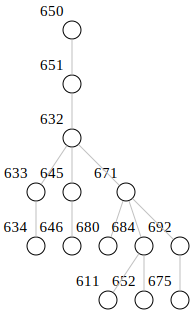

In [5]:
# --------- [ESSENTIAL] create feeder obj ----------
fin_feeder = ff.feeder_init(modelpath,loadfolder,loadpath,timesteps,Vbase_ll,Sbase,depths,leaves)
print("Finished initializing feeder")
ff.make_graph(fin_feeder, file_name)
node_index_map = hm.createNodeIndexMap(fin_feeder) #node indices for indicMat and F matrix
R,X=hm.createRXmatrices_3ph(fin_feeder, node_index_map,depths)

print(depths) # should be populated

count = 0 # print list of buses in network
for i in fin_feeder.network:    
    print(i) 
    count += 1
    if count >= 10:
        break
    
Source.from_file(file_name)
#^ need this to plot feeder

In [6]:
# ----- Create Fig 1 ---------
# we have two options, both are not very interesting for 13NF

# Assess feas of placing 1 colocated at each node on feeder
# result: all locations are green
all_act_locs = []
perf_nodes = []
# empty act locs asks heatMapProcess to create heatmap for empty network, i.e. feas of placing 1 co-located actuator at each loc
feas_configs, heatMapNames=hm.find_good_colocated(fin_feeder, [], node_index_map,substation_name,depths, file_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)
ff.clear_graph(fin_feeder)
print('----------- Feas configs are: ---------')
print(feas_configs)

# Place maximum number of colocated act/perf nodes on network randomly. If infeas loc tested, randomly select another test node and continue function run
# result: can place colocated at all nodes
max_act_config = hm.place_max_coloc_acts(fin_feeder, file_name, node_index_map, depths, substation_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)

evaluating act and perf colocated at  ['bus_611']
Config feasible!
num feas= [[150.]]
num tried= 225
evaluating act and perf colocated at  ['bus_632']
Config feasible!
num feas= [[14.]]
num tried= 225
evaluating act and perf colocated at  ['bus_633']
Config feasible!
num feas= [[69.]]
num tried= 225
evaluating act and perf colocated at  ['bus_634']
Config feasible!
num feas= [[147.]]
num tried= 225
evaluating act and perf colocated at  ['bus_645']
Config feasible!
num feas= [[94.]]
num tried= 225
evaluating act and perf colocated at  ['bus_646']
Config feasible!
num feas= [[110.]]
num tried= 225
evaluating act and perf colocated at  ['bus_652']
Config feasible!
num feas= [[145.]]
num tried= 225
evaluating act and perf colocated at  ['bus_671']
Config feasible!
num feas= [[34.]]
num tried= 225
evaluating act and perf colocated at  ['bus_675']
Config feasible!
num feas= [[131.]]
num tried= 225
evaluating act and perf colocated at  ['bus_680']
Config feasible!
num feas= [[80.]]
num tried=

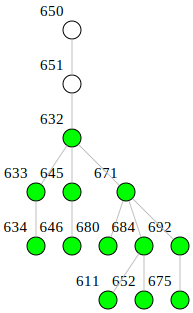

In [7]:
Source.from_file(heatMapNames[0]) # display graph in notebook

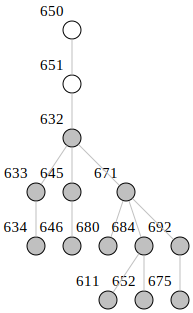

In [8]:
Source.from_file('actConfig_max_coloc')

Color Bin Key
gray: (0.0 --> 0.10649508163212756)
green: (0.10649508163212756 --> 0.21299016326425513)
limegreen: (0.21299016326425513 --> 0.3194852448963827)
yellowgreen: (0.3194852448963827 --> 0.42598032652851026)
yellow: (0.42598032652851026 --> 0.5324754081606378)
gold: (0.5324754081606378 --> 0.6389704897927654)
orange: (0.6389704897927654 --> 0.745465571424893)
red: (0.745465571424893 --> 0.8519606530570205)

 Phase Coupling Ratios
{'bus_611': (0.7820116177268258+0.020402049989273925j), 'bus_632': (0.8517286814197176-0.01987982908312266j), 'bus_633': (0.8080216927903616+0.0282712983425571j), 'bus_634': (0.8080216927903616+0.0282712983425571j), 'bus_645': (0.7313580747123343+0.052097015958352665j), 'bus_646': (0.6771002359657674+0.0747498912950545j), 'bus_650': 0, 'bus_651': 0.0, 'bus_652': (0.7666413907951195+0.052417160013480964j), 'bus_671': (0.8517286814197174-0.019879829083122687j), 'bus_675': (0.8175139665583364-0.02567708301397046j), 'bus_680': (0.8517286814197176-0.019879

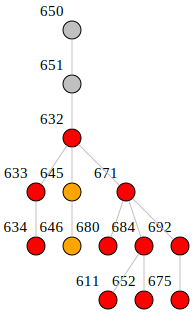

In [9]:
# ----- Create Figure 2 ---------
# phase coupling values = ratio of mutual impedance to self impedance for each path to substation
ratios = vis.phaseCouplingPerNode(fin_feeder,depths)
vis.createColorMap(fin_feeder, ratios, 'fig2_13NF')
print('\n Phase Coupling Ratios')
print(ratios)
Source.from_file('colorMap_fig2_13NF') # display graph in notebook

Color Bin Key
gray: (-1.0 --> -1.0)
green: (-1.0 --> -1.0)
limegreen: (-1.0 --> -1.0)
yellowgreen: (-1.0 --> -1.0)
yellow: (-1.0 --> -1.0)
gold: (-1.0 --> -1.0)
orange: (-1.0 --> -1.0)
red: (-1.0 --> -1.0)
{'bus_611': -1, 'bus_632': -1, 'bus_633': -1, 'bus_634': -1, 'bus_645': -1, 'bus_646': -1, 'bus_652': -1, 'bus_671': -1, 'bus_675': -1, 'bus_680': -1, 'bus_684': -1, 'bus_692': -1}


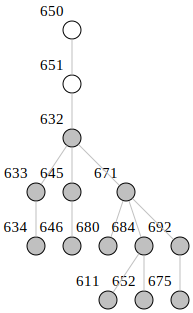

In [10]:
# ----- Create Figure 3 ---------
#  Color map overlayed onto feeder diagram that shows linearization error
# "feas_configs" should exist from call to "find_good_colocated" called for Fig 1
lzn_err_dic = {}

for dic in feas_configs:
    node = (dic['act'])[0]
    lzn_err = (dic['lznErr'])[0]
    lzn_err_dic[node] = lzn_err

vis.createColorMap(fin_feeder, lzn_err_dic, 'fig3_13NF') 
ff.clear_graph(fin_feeder)
print(lzn_err_dic)
Source.from_file('colorMap_fig3_13NF')  # display graph in notebook

In [11]:
# ----- Create Table 1 ---------
# complex config 1
all_act_locs = ['bus_675','bus_611','bus_652','bus_645']
perf_nodes = ['bus_671','bus_684','bus_684','bus_632']

Zbase = (Vbase**2)/(Sbase*1000)
P_lb_results, P_ub_results, Q_lb_results, Q_ub_results = lzn.computePQsweep_timesteps(fin_feeder, load_data)
PQ_bounds, PQ_losses = lzn.computePQsweep_losses(fin_feeder, all_act_locs, Sbase, Zbase, P_lb_results, P_ub_results, Q_lb_results, Q_ub_results, headerpath, substation_name, modelpath, depths)
data = [['Timestep', 'Computed Line Losses', '', 'True Line Losses', ''],
        ['','P_loss', 'Q_loss', 'P_loss', 'Q_loss'], 
        ['P_lb, Ts='+str(P_lb_results[0]), PQ_losses[0], PQ_losses[1], '*', '*'],
        ['P_ub, Ts='+str(P_ub_results[0]), PQ_losses[2], PQ_losses[3], '*', '*'],
        ['Q_lb, Ts='+str(Q_lb_results[0]), PQ_losses[4], PQ_losses[5], '*', '*'],
        ['Q_ub, Ts='+str(Q_ub_results[0]), PQ_losses[6], PQ_losses[7], '*', '*']]

dash = '-' * 60
print(dash)
print('{:<15s}{:>20s}{:>5s}{:^18s}{:>4s}'.format(data[0][0],data[0][1],data[0][2],data[0][3], data[0][4]))
print('{:<10s}{:>12s}{:>12s}{:>12s}{:>12s}'.format(data[1][0],data[1][1],data[1][2],data[1][3], data[1][4]))
print(dash)
for i in range(len(data))[2:]:
    print('{:<12s}{:>12f}{:>12f}{:>12s}{:>12s}'.format(data[i][0],data[i][1],data[i][2],data[i][3], data[i][4]))


------------------------------------------------------------
Timestep       Computed Line Losses      True Line Losses     
                P_loss      Q_loss      P_loss      Q_loss
------------------------------------------------------------
P_lb, Ts=417    0.012910    0.035218           *           *
P_ub, Ts=725    0.087662    0.253753           *           *
Q_lb, Ts=169    0.022741    0.065816           *           *
Q_ub, Ts=865    0.164059    0.490689           *           *


In [12]:
# ----------- Figure 4, RHP on complex config 3 --------------
# Let's see where feas is lost! With complex config 3 (infeas)
all_act_locs = ['bus_611','bus_652','bus_645','bus_675',]
perf_nodes = ['bus_684','bus_684','bus_632','bus_671']
lst_feas_configs, lzn_error_run_sum,heatMapNames = hm.runHeatMapProcess(fin_feeder, all_act_locs, perf_nodes, node_index_map,substation_name,depths,file_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)

evaluating act at  ['bus_611'] , perf at  ['bus_684']
Config feasible!
num feas= [[151.]]
num tried= 225
evaluating act at  ['bus_632'] , perf at  ['bus_684']
Config feasible!
num feas= [[29.]]
num tried= 225
evaluating act at  ['bus_633'] , perf at  ['bus_684']
Config feasible!
num feas= [[17.]]
num tried= 225
evaluating act at  ['bus_634'] , perf at  ['bus_684']
Config feasible!
num feas= [[17.]]
num tried= 225
evaluating act at  ['bus_645'] , perf at  ['bus_684']
Config feasible!
num feas= [[22.]]
num tried= 225
evaluating act at  ['bus_646'] , perf at  ['bus_684']
Config feasible!
num feas= [[20.]]
num tried= 225
evaluating act at  ['bus_652'] , perf at  ['bus_684']
Config feasible!
num feas= [[150.]]
num tried= 225
evaluating act at  ['bus_671'] , perf at  ['bus_684']
Config feasible!
num feas= [[132.]]
num tried= 225
evaluating act at  ['bus_675'] , perf at  ['bus_684']
Config feasible!
num feas= [[117.]]
num tried= 225
evaluating act at  ['bus_680'] , perf at  ['bus_684']
Config

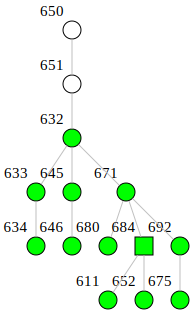

In [13]:
Source.from_file(heatMapNames[0]) # display graph in notebook
# we place 611-->684

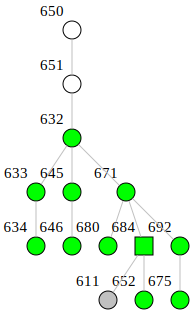

In [14]:
Source.from_file(heatMapNames[1]) # display graph in notebook
# we place 652-->684

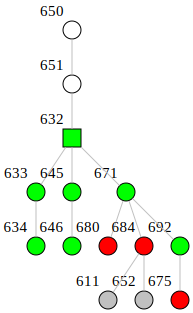

In [15]:
Source.from_file(heatMapNames[2]) # display graph in notebook
# we place 645-->632

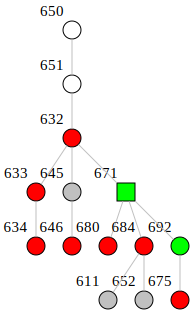

In [16]:
Source.from_file(heatMapNames[3]) # display graph in notebook
# we are looking to track 671, but stupidly choose 675 as act node even though heat map shows red
# we place 675-->671, resulting in infeas config

In [17]:
# ------- Create Fig 5 and 7,+ validate fesa with eval_config ----------
# Desc: Two diagrams for 2 complex config1 and 2, labeled with act/perf node locations, plus PV curves

# Define Complex Config 3 (infeas)
all_act_locs = ['bus_675','bus_611','bus_652','bus_645']
perf_nodes = ['bus_671','bus_684','bus_684','bus_632']
feas, maxError,numfeas=hm.eval_config(fin_feeder, all_act_locs,perf_nodes, node_index_map,substation_name,depths,file_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)
# normally file_name='13NF_test.dot'
vis.markActuatorConfig(all_act_locs, fin_feeder, 'complex_config_1')
ff.clear_graph(fin_feeder)

# Define Complex Config 4 (feas)
all_act_locs = ['bus_611','bus_675','bus_645','bus_646']
perf_nodes = ['bus_671','bus_671','bus_632','bus_646']
feas, maxError,numfeas=hm.eval_config(fin_feeder, all_act_locs,perf_nodes, node_index_map,substation_name,depths,file_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)
vis.markActuatorConfig(all_act_locs, fin_feeder, 'complex_config_2')
ff.clear_graph(fin_feeder)

# BUG: second call to markActCOnfig appends actuator nodes to previous graph

No (or not enough) F found for config --> infeas
num feas= [[0.]]
num tried= 225
Actuator configuration is not feasible
Config feasible!
num feas= [[166.]]
num tried= 225
Actuator configuration is feasible


In [18]:
# Figure 6: not done in python, simulate cc3 with lin state space sim and RTlab
# Figure 7: PV curves for cc3, produced at sam

{'bus_650': 0, 'bus_651': 1, 'bus_632': 2, 'bus_671': 3, 'bus_633': 3, 'bus_645': 3, 'bus_680': 4, 'bus_684': 4, 'bus_692': 4, 'bus_634': 4, 'bus_646': 4, 'bus_611': 5, 'bus_652': 5, 'bus_675': 5}


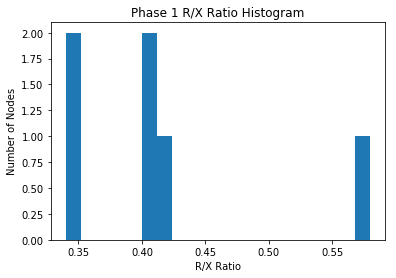

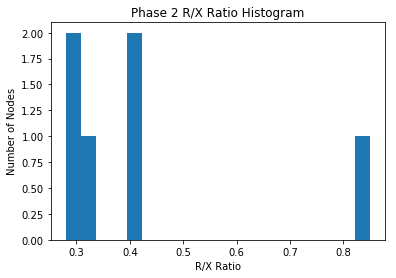

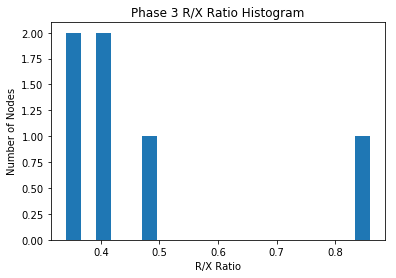

Z between buses:
[[0.20646593+0.4626648j  0.05909091+0.19003788j 0.07158713+0.18653978j]
 [0.05909091+0.19003788j 0.12784091+0.39689394j 0.05814394+0.14579546j]
 [0.07158713+0.18653978j 0.05814394+0.14579546j 0.2048523 +0.4685095j ]]

Z to substation:
[[0.13125004+0.38556831j 0.05909093+0.19003794j 0.0598485 +0.1604546j ]
 [0.05909093+0.19003794j 0.12784095+0.39689407j 0.05814396+0.1457955j ]
 [0.0598485 +0.1604546j  0.05814396+0.1457955j  0.12931822+0.39196982j]]

X/R ratio of path to substation:
{'Phase 1': 0.34, 'Phase 2': 0.33, 'Phase 3': 0.34}


In [19]:
# ------ [Optional] run impedance-related functions --------
slack_bus = None
for bus_name, depth in depths.items():
    if depth == 0:
        slack_bus = bus_name
        break
print(depths)
# modify node names when change feeders
imp.plot_histogram_RX_ratios(fin_feeder,leaves,slack_bus,depths,leaves_only = True)
print('Z between buses:')
print(imp.get_total_impedance_between_two_buses(fin_feeder, 'bus_632', 'bus_684',depths))
print('\nZ to substation:')
print(imp.get_total_impedance_from_substation(fin_feeder, 'bus_632',depths))
print('\nX/R ratio of path to substation:')
print(imp.get_RX_ratio_tosubst(fin_feeder, 'bus_632',depths))
# should check on how to format the printing do that it's to like 2 decimal places

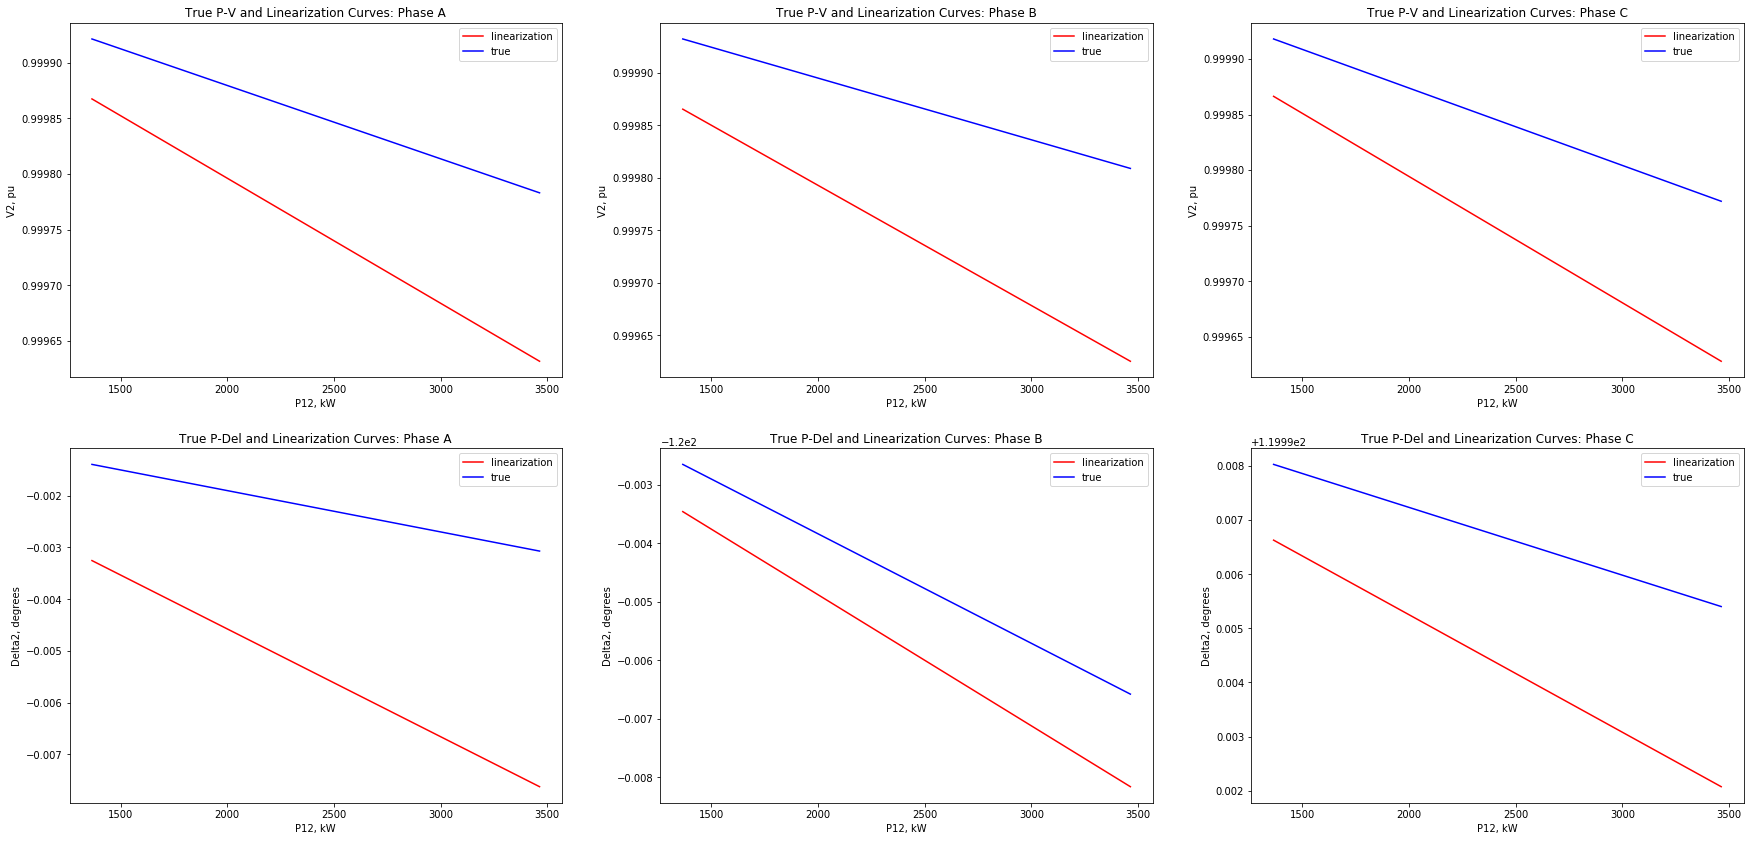

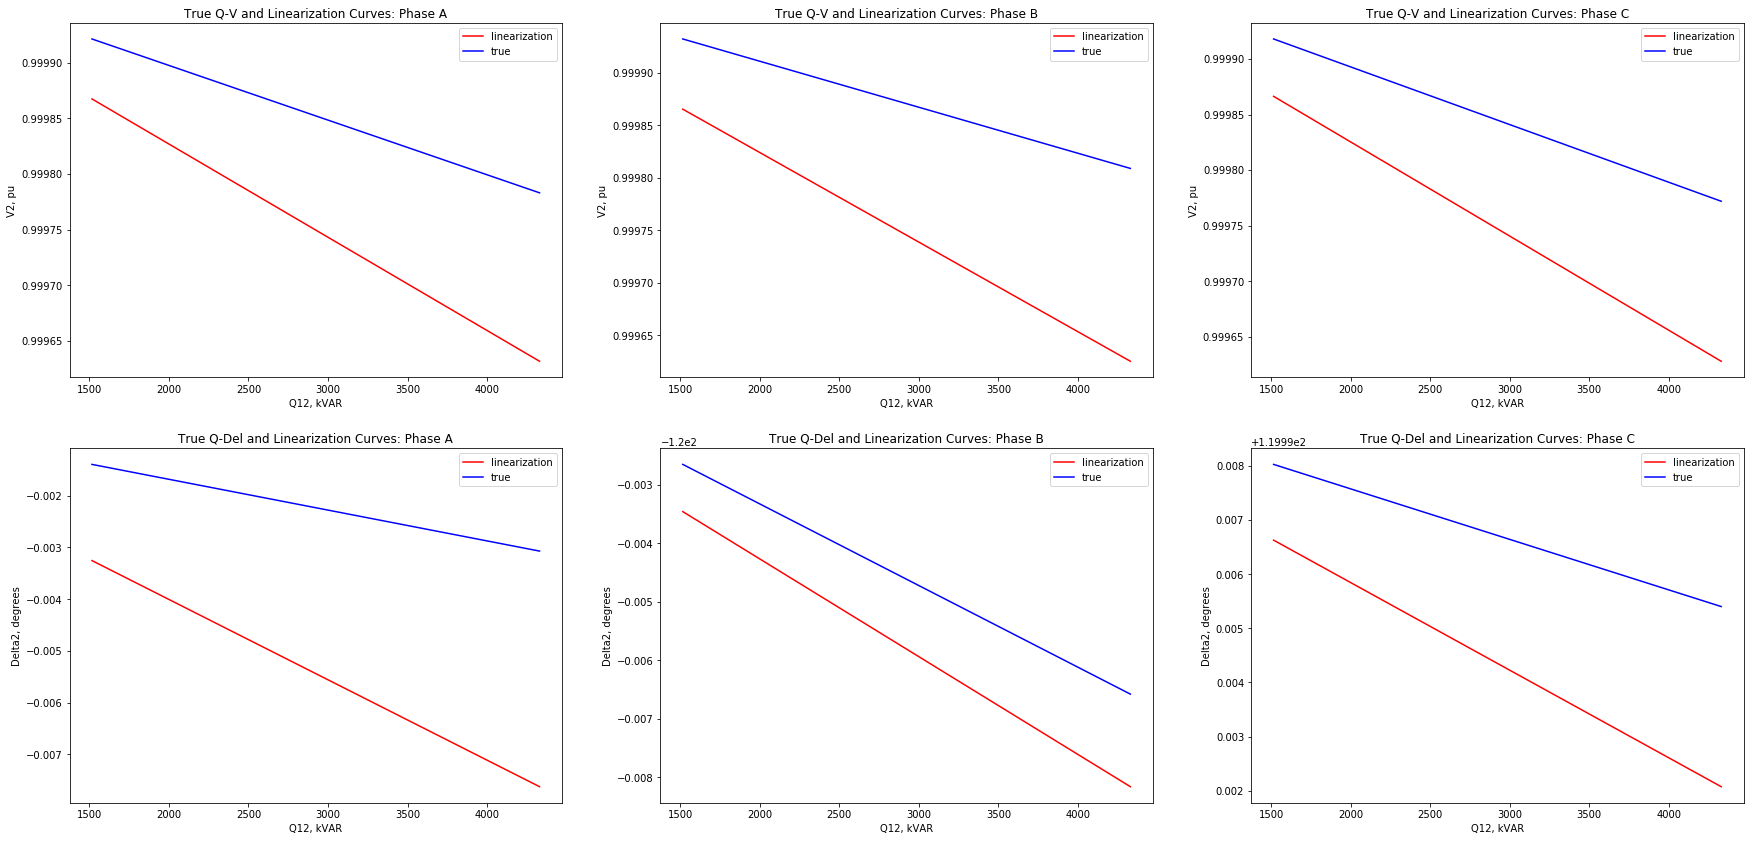

In [20]:
# ----- run detLznRange ---------
z12 = imp.get_total_impedance_from_substation(fin_feeder, 'bus_632', depths) # 3 phase
B12=np.zeros((3,3)) # TEMPORARY, line susceptance, Yshunt=G+jB
printCurves=True
all_act_locs = ['bus_611','bus_675','bus_645','bus_646']
lzn_err_max, slopes = lzn.detLznRange(fin_feeder, Vbase_ll, Sbase, z12,B12, all_act_locs, load_data, headerpath, substation_name, modelpath, depths,printCurves) # usually called by computeFeas
#^ calls computePQsweep, makePVcurve, makeQVcurve, computeLznItvl

In [21]:
# ----- Run computeFParamSpace  and save R and X matrices as csv ---------

#importlib.reload(ctrl)
all_act_locs = ['bus_645','bus_646','bus_611','bus_675']
perf_nodes = ['bus_632','bus_646','bus_671','bus_671']
Fq_ub,Fp_ub=ctrl.computeFParamSpace_v2(fin_feeder, all_act_locs, perf_nodes,R,X,depths,node_index_map)
# this function prints Zgood (from R and X matrices) and Z_toSubst, where Z_toSubst is correct but doesnt match Zgood. Investigate
print('(Fp_ub,Fq_ub)=(',Fp_ub,',',Fq_ub,')')
#print('(q,p)=(',q,',',p,')')

# Save R and X matrices to csv to import into matlab
# np.savetxt reference: https://thispointer.com/how-to-save-numpy-array-to-a-csv-file-using-numpy-savetxt-in-python/
#np.savetxt('Rmat_13NF.csv', R, delimiter=',')
#np.savetxt('Xmat_13NF.csv', X, delimiter=',')

(Fp_ub,Fq_ub)=( 0.5864873766700018 , 0.2819519243734431 )


V2_3ph= [[0.97208053]
 [0.98069841]
 [0.9997996 ]]
del2_3ph= [[   1.99571769]
 [-120.99928777]
 [ 113.10412506]]
--------------------------------------------------
V2_3ph= [[2395.97970685]
 [2398.59611864]
 [2396.36318982]]
del2_3ph= [[  -0.19067663]
 [-120.22241282]
 [ 119.78021963]]


(array([-5000.        ,  -789.47368421,  3421.05263158,  7631.57894737,
        11842.10526316, 16052.63157895, 20263.15789474, 24473.68421053,
        28684.21052632, 32894.73684211, 37105.26315789, 41315.78947368,
        45526.31578947, 49736.84210526, 53947.36842105, 58157.89473684,
        62368.42105263, 66578.94736842, 70789.47368421, 75000.        ]),
 {'trueV2': array([[2401.40757257, 2400.44126148, 2399.47547766, 2398.51022173,
          2397.54549433, 2396.5812961 , 2395.61762768, 2394.65448971,
          2393.69188283, 2392.72980768, 2391.7682649 , 2390.80725514,
          2389.84677903, 2388.88683723, 2387.92743037, 2386.9685591 ,
          2386.01022406, 2385.05242591, 2384.09516529, 2383.13844285],
         [2402.0003315 , 2401.40932831, 2400.81909153, 2400.22962171,
          2399.64091942, 2399.05298523, 2398.4658197 , 2397.87942339,
          2397.29379688, 2396.70894072, 2396.12485548, 2395.54154172,
          2394.959     , 2394.3772309 , 2393.79623497, 2393.2160127

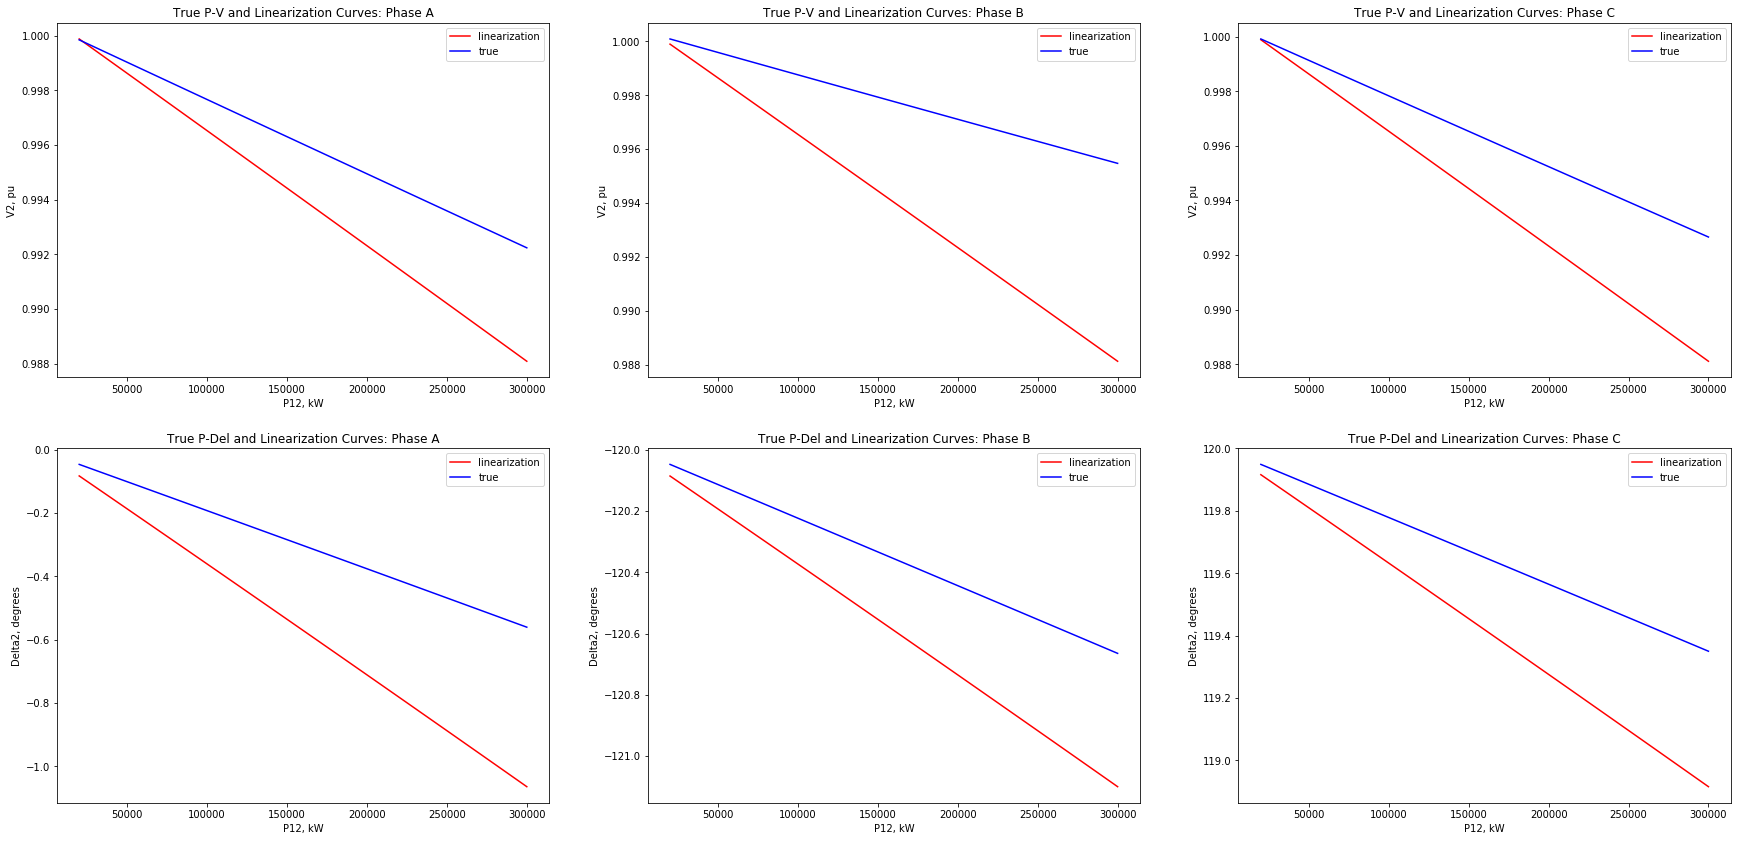

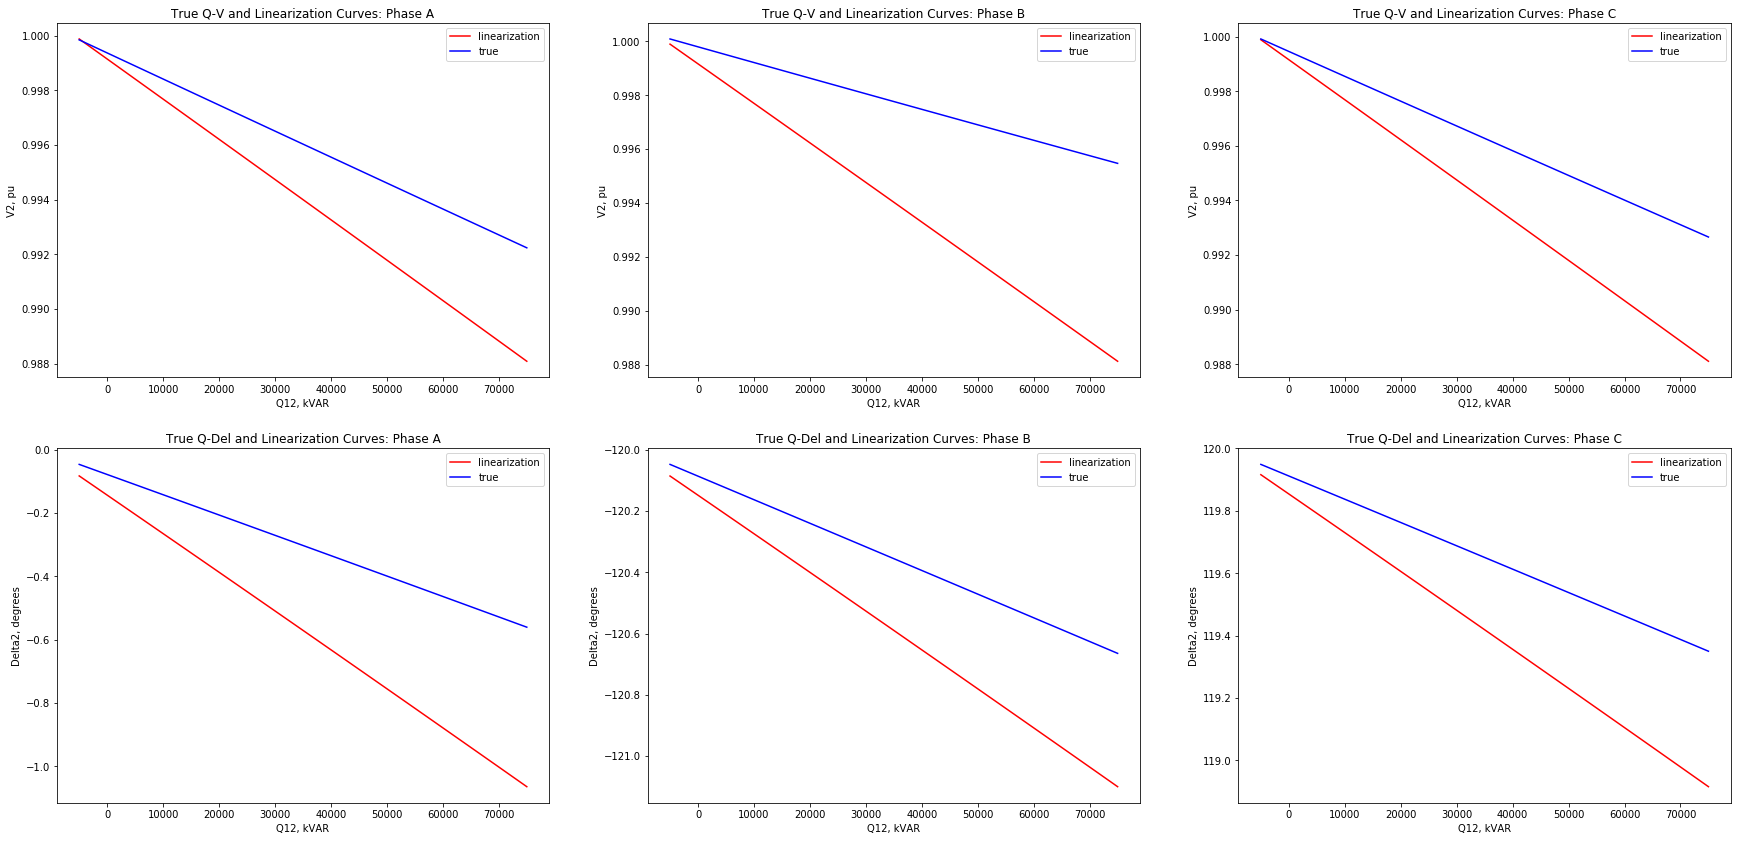

In [22]:
# -------- Solve 3-ph fwd-bwd sweep for toy example ----------
# values have been validated wrt matlab translation
R12=np.identity(3) # per unit
X12=3*np.identity(3)
B12=(10**-6)*0.5*np.ones(3);
V1a=Vbase*np.cos(0*np.pi/180)+1j*Vbase*np.sin(0*np.pi/180); # angle=0 deg
V1b=Vbase*np.cos(-120*np.pi/180)+1j*Vbase*np.sin(-120*np.pi/180); # angle=-120 deg
V1c=Vbase*np.cos(+120*np.pi/180)+1j*Vbase*np.sin(+120*np.pi/180); # angle=+120 deg
V1=np.transpose([[V1a, V1b, V1c]])/Vbase;
V2=np.array([[0.97, 0.98, 0.985]]).transpose()
del2=np.array([[2, -120-1, 120-7]]).transpose() # degrees
V2cplx=np.multiply(V2,np.cos(del2*np.pi/180))+np.multiply(V2,np.sin(del2*np.pi/180)*1j)
I=np.dot(np.linalg.inv(R12+1j*X12),V1-V2cplx) # I=YV, 3x1 = (3x3)(3x1) matrix mult
S2=np.multiply(V2cplx,np.conj(I)); # 3x1=(3x1)(3x1) elementwise!
P2=np.real(S2)
Q2=np.imag(S2);

# inputs: 3x3 matrices and 3x1 vectors
V2_3ph,del2_3ph=lzn.solveFwdBwdSweep_2bus_3ph(R12, X12, B12,V1, P2, Q2)
# outputs: 3x1 vector for mag (Vpu), 3x1 vector for phase angle (degrees)
print('V2_3ph=',V2_3ph)
print('del2_3ph=',del2_3ph)

print('--------------------------------------------------')
R12=0.37878788*np.array([[ 0.3465,  0.156,  0.158,], # not pu
       [ 0.156,  0.3375,  0.1535,],
       [ 0.158,  0.1535,  0.3414]])
X12=0.37878788*np.array([[ 1.0179,  0.5017,  0.4236,],
       [ 0.5017,  1.0478,  0.3849,],
       [ 0.4236,  0.3849,  1.0348]])
B12=0.37878788*(10**-6)*np.array([[6.2998,  -1.9958,  -1.2595,],
    [-1.9958,  5.9597,  -0.7417,],
    [-1.2595,  -0.7417,  5.6386]]) # line susceptance, Yshunt=G+jB, impedacen excel gives in uS so multiply by 10^-6 to get to SI units
V1=Vbase*np.ones((3,1)) # 2401
# key: V1 in 3 phase is not all angle=0! Need cos and sin
V1a=Vbase*np.cos(0*np.pi/180)+1j*Vbase*np.sin(0*np.pi/180); # angle=0 deg
V1b=Vbase*np.cos(-120*np.pi/180)+1j*Vbase*np.sin(-120*np.pi/180); # angle=-120 deg
V1c=Vbase*np.cos(+120*np.pi/180)+1j*Vbase*np.sin(+120*np.pi/180); # angle=+120 deg
V1=np.transpose([[V1a, V1b, V1c]]);
P2=100000*np.ones((3,1)) # watts, to be congruent with volts and ohms
Q2=20000*np.ones((3,1))
V2_3ph,del2_3ph=lzn.solveFwdBwdSweep_2bus_3ph(R12, X12, B12,V1, P2, Q2)
print('V2_3ph=',V2_3ph)
print('del2_3ph=',del2_3ph)


# ----------- run makePVcurve ---------
Plb=20000 # 20kW
Pub=300000 # 300kW
Qlb=-5000 # -5kW
Qub=75000 # 75kW
printCurves=True
PQ_bounds=[Plb/Sbase, Pub/Sbase, Qlb/Sbase, Qub/Sbase] # input as pu
lzn.makePVcurve_3ph(PQ_bounds, Sbase, Vbase, R12, X12, B12, V1,printCurves)
lzn.makeQVcurve_3ph(PQ_bounds, Sbase, Vbase, R12, X12, B12, V1,printCurves)
# true curve looks fine, lzn curve wrong

In [23]:
# ---------- Compare 1 to many on branch ----------
# Compare heatmaps for many actuators on a branch tracking middle node, and one colocated actuator/perf on middle node
branches = vis.assign_network_branches(fin_feeder, substation_name)
print('branches =', branches)

my_branch = branches[5] # choosing a branch that doesn't include substation (no interesting options for 13NF)
if 'bus_650' in my_branch:
    my_branch.remove('bus_650')
    my_branch.remove('bus_651')
middle_node = my_branch[len(my_branch)//2]
act_locs = my_branch
act_locs.remove(middle_node)
perf_nodes = [middle_node for _ in act_locs]
print('act locs =',act_locs)
print('perf nodes =',perf_nodes)
# add on "middle_node" pair, because heatmap is for once you've placed act at middle node
feas_configs, lzn_error_run_sum, one_act = hm.runHeatMapProcess(fin_feeder, [middle_node]+[my_branch[2]], [middle_node]+[middle_node], node_index_map, substation_name, depths, file_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)

branches = [['bus_633', 'bus_634'], ['bus_645', 'bus_646'], ['bus_680'], ['bus_611'], ['bus_684', 'bus_652'], ['bus_650', 'bus_651', 'bus_632', 'bus_671', 'bus_692', 'bus_675']]
act locs = ['bus_632', 'bus_671', 'bus_675']
perf nodes = ['bus_692', 'bus_692', 'bus_692']
evaluating act at  ['bus_611'] , perf at  ['bus_692']
Config feasible!
num feas= [[126.]]
num tried= 225
evaluating act at  ['bus_632'] , perf at  ['bus_692']
Config feasible!
num feas= [[34.]]
num tried= 225
evaluating act at  ['bus_633'] , perf at  ['bus_692']
Config feasible!
num feas= [[20.]]
num tried= 225
evaluating act at  ['bus_634'] , perf at  ['bus_692']
Config feasible!
num feas= [[20.]]
num tried= 225
evaluating act at  ['bus_645'] , perf at  ['bus_692']
Config feasible!
num feas= [[25.]]
num tried= 225
evaluating act at  ['bus_646'] , perf at  ['bus_692']
Config feasible!
num feas= [[22.]]
num tried= 225
evaluating act at  ['bus_652'] , perf at  ['bus_692']
Config feasible!
num feas= [[124.]]
num tried= 225


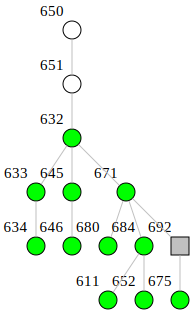

In [24]:
# display heatmap for one colocated actuator/perf node
ff.clear_graph(fin_feeder)
Source.from_file(one_act[-1])

In [25]:
# ---------- Compare 1 to many on branch ----------
# add on "middle_node" pair, because heatmap is for once you've placed act at middle node
feas_configs, lzn_error_run_sum, many_acts = hm.runHeatMapProcess(fin_feeder, act_locs + ['bus_633'], perf_nodes + [middle_node], node_index_map, substation_name, depths, file_name,Vbase_ll, Sbase, load_data, headerpath, modelpath)

evaluating act at  ['bus_611'] , perf at  ['bus_692']
Config feasible!
num feas= [[126.]]
num tried= 225
evaluating act at  ['bus_632'] , perf at  ['bus_692']
Config feasible!
num feas= [[34.]]
num tried= 225
evaluating act at  ['bus_633'] , perf at  ['bus_692']
Config feasible!
num feas= [[20.]]
num tried= 225
evaluating act at  ['bus_634'] , perf at  ['bus_692']
Config feasible!
num feas= [[20.]]
num tried= 225
evaluating act at  ['bus_645'] , perf at  ['bus_692']
Config feasible!
num feas= [[25.]]
num tried= 225
evaluating act at  ['bus_646'] , perf at  ['bus_692']
Config feasible!
num feas= [[22.]]
num tried= 225
evaluating act at  ['bus_652'] , perf at  ['bus_692']
Config feasible!
num feas= [[124.]]
num tried= 225
evaluating act at  ['bus_671'] , perf at  ['bus_692']
Config feasible!
num feas= [[145.]]
num tried= 225
evaluating act at  ['bus_675'] , perf at  ['bus_692']
Config feasible!
num feas= [[129.]]
num tried= 225
evaluating act at  ['bus_680'] , perf at  ['bus_692']
Config

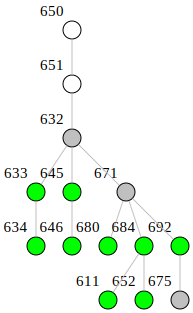

In [26]:
# display heatmap for many actuators tracking one perf node
ff.clear_graph(fin_feeder)
Source.from_file(many_acts[-1]) # show the last file "many_acts"

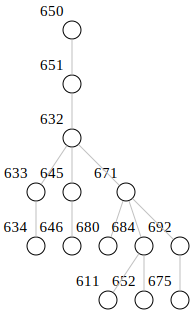

In [27]:
# ----- run markCommonFeasNodes ---------"
# input a list of feasible actuator configurations where each configuration is its own list (ie a list of lists)"
# for actuator locations that appear in every configuration, mark node blue"
lst_feas_configs = []
for dic in feas_configs:
    lst_feas_configs += [dic['act']]
    
shared_act_locs = vis.markCommonFeasNodes(lst_feas_configs, fin_feeder, file_name)
Source.from_file('shared_act_locs_' + file_name)

In [29]:
# ----- run find_ActLoc_in_FeasConfigs ---------"
# act_loc = node name of potential actuator location"
# feas_configs = a list of feasible actuator configurations"
act_loc = 'bus_633'
configs_with_act = vis.find_ActLoc_in_FeasConfigs(act_loc, lst_feas_configs)
print('configs_with_act: ', configs_with_act)

configs_with_act:  [['bus_633'], ['bus_633', 'bus_632'], ['bus_633', 'bus_632', 'bus_671'], ['bus_633', 'bus_632', 'bus_671', 'bus_675']]


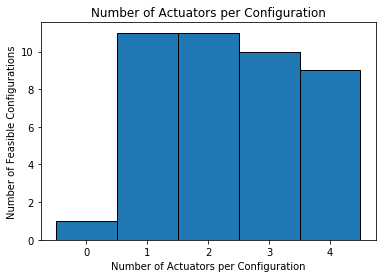

In [31]:
# ----- run plot_actuator_num_histogram ---------"
# input list of lists of feasible actuator configurations"
# output histogram reflecting number of actuators in each configuration"
vis.plot_actuator_num_histogram(lst_feas_configs, file_name)    

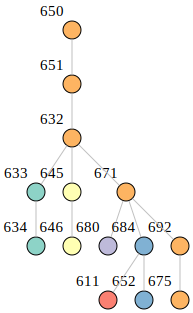

In [33]:
# ----- run assign_network_branches ---------"
branches = vis.assign_network_branches(fin_feeder, substation_name)
vis.mark_network_branches(fin_feeder, branches, file_name)
Source.from_file('branch_key:' + file_name)

In [34]:
# ----- run find_good_branches ---------"
num_good_branches = 3
vis.find_good_branches(lst_feas_configs, branches, num_good_branches)

Branches are represented by their first node (the node closest to the substation).

Common Branches:
['bus_633', 'bus_645', 'bus_680', 'bus_611', 'bus_684', 'bus_650']

The 3 best branches when each actuator configuration is only considered once:
['bus_650 = 10 actuators', 'bus_633 = 8 actuators', 'bus_645 = 8 actuators']

The 3 best branches when each actuator configuration is considered multiple times:
['bus_650 = 68 actuators', 'bus_633 = 8 actuators', 'bus_645 = 8 actuators']


In [35]:
# ----- run determine_good_or_bad_branch ---------"
branch = branches[-1] 
num_configs_for_good_branch = 5
configs_with_branch = vis.determine_good_or_bad_branch(branch, lst_feas_configs, num_configs_for_good_branch)

Branch ['bus_650', 'bus_651', 'bus_632', 'bus_671', 'bus_692', 'bus_675'] is good.

Number of configurations that use the branch: 34
